# Gibbs Sampler para los modelos hard-core y q-coloring


Autores: 
- Daniel Alejandro García Hernández
-

En este notebook se encuentra una implementación del Gibbs Sampler para Hard-core y q-colorings. 

Las librerías necesarias para ejectuar el código son:

In [254]:
import random
import networkx as nx
import matplotlib.pyplot as plt

---
## **Punto 1: Gibbs Sampler para el modelo Hard-Core**

Iniciamos creando la grilla del módelo. Para esto, creamos un grafo cuadrado 2D de NetworkX, el cuál recibe de input el valor de $k$, las dimensiones del grafo. $3\leq k \leq 20$.

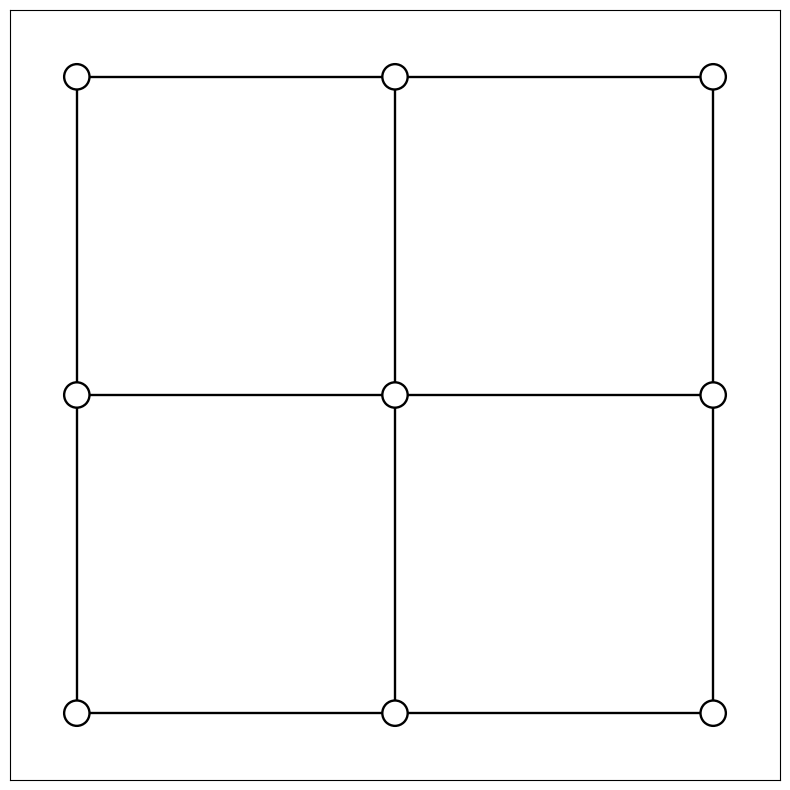

In [4]:
def restart_G(k):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    color_values = {node: "white" for i, node in enumerate(G.nodes())}
    return G, color_values

    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": 1000/k,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    
    

k = 3

    
# Iniciar el valor de los colores
G, color_values = restart_G(k)  

# Graficar la grilla
plot_grid(color_values)

Definimos la función que actualiza el sistema en un único paso; es decir, pasa de $X_n$  a $X_{n+1}$. Para esto, el algoritmo:

1. Elige un vértice $v$ al azar, con distribución uniforme.
2. Lanza una moneda justa.
3. Si el resultado del lanzamiento es "sello", coloréa el vértice $v$ de blanco.
4. Si el resultado es "cara", y todos los vecinos del nodo $v$ son blancos, entonces colorea el nodo $v$ de negro.

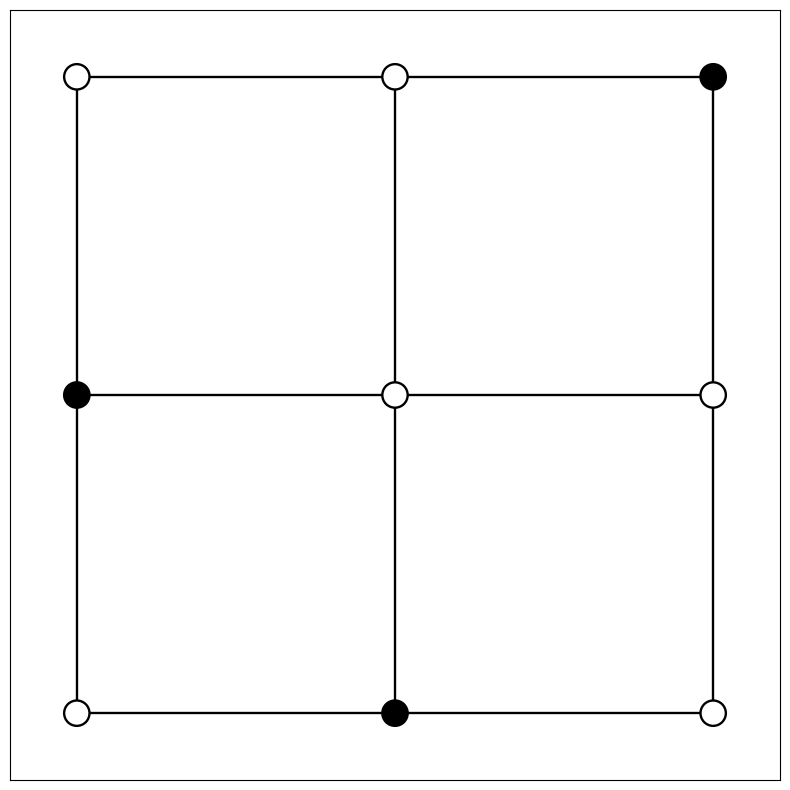

In [176]:
def step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))


    coin = random.choice(("cara", "sello"))

    if coin == "cara":
        movimiento_legal = True
        vecinos_list = [n for n in G.neighbors((x,y))]
        for vecino in vecinos_list:
            if color_values[vecino] != "white":
                movimiento_legal = False


        if movimiento_legal:
            color_values[(x,y)] = "black"

        else:
            color_values[(x,y)] = "white"
    else:
        color_values[(x,y)] = "white"


step()

plot_grid(color_values)

---
## Punto 2. Distribución del número de partículas del modelo Hard-core


Antes de hallar la distribución, definimos algunas funcines que serán de utilidad: Contar el número de partículas de una grilla determinada, evolucionar el sistema hasta un valor de $n$ lo suficientemente grande (en este caso, $n = 10k$, o $n=100k$), y hallar el valor promedio del histograma

In [255]:
def count_particles(color_values):
    counter = 0
    colores_list = list(color_values.values())
    for color in colores_list:
        if color == "black":
            counter += 1
            
    return counter
    
    
def find_evolution(n):
    for ii in range(n):
        step()
    
    
def find_expected_value(particle_distribution, n_repetitions):
    suma = 0
    x_vector = list(particle_distribution.keys())
    y_vector = list(particle_distribution.values())
    for ii in range(len(particle_distribution)):
        suma += x_vector[ii] * y_vector[ii]
        
    return suma/n_repetitions

Para hallar el histograma, definimos una "simulación", como avanzar el sistema hasta el paso $n$; es decir, hallamos $X_{n}$, y hacemos un número determinado de simulaciones.

Existen 2 parámetros de entrada:
- $k$, el tamaño de la grilla del sistema.
- n_repetitions, el número de simulaciones que se realizarán.

Después de esto, se cuenta el número de partículas presentes en la distribución.

In [256]:
k = 10
n_repetitions = 1000

particle_distribution1 = {i: 0 for i in range(k*k)} # Distribución para 10k
particle_distribution2 = {i: 0 for i in range(k*k)} # Distribución para 100k

for ii in range (n_repetitions):
    """Hallar el histograma para 10k pasos de evolucion"""
    ## Reiniciar los valores de G    
    G, color_values = restart_G(k)
    
    ## Hacer una evolución de muchos pasos
    find_evolution(10000)
    
    
    ## Contar cuántas partículas hay
    particulas = count_particles(color_values)
       
    
    ## Añadir el resultado a la distribución
    particle_distribution1[particulas] += 1
    
    
    
    """Repetir el procedimiento, ahora con 100k"""
    ## Reiniciar los valores de G    
    G, color_values = restart_G(k)
    
    ## Hacer una evolución de muchos pasos
    find_evolution(100000)
    
    
    ## Contar cuántas partículas hay
    particulas = count_particles(color_values)
       
    
    ## Añadir el resultado a la distribución
    particle_distribution2[particulas] += 1
    
    

print("Simulación finalizada")
print(f"Se han simulado {n_repetitions} veces los sistemas" + r'$X_{10k}$ y $X_{100k}$')
print("\n \n")

Simulación finalizada
Se han simulado 1000 veces los sistemas$X_{10k}$ y $X_{100k}$


Finalmente, se grafica el histograma obtenido del número de partículas presentes en el sistema, donde también se incluye el valor promedio:

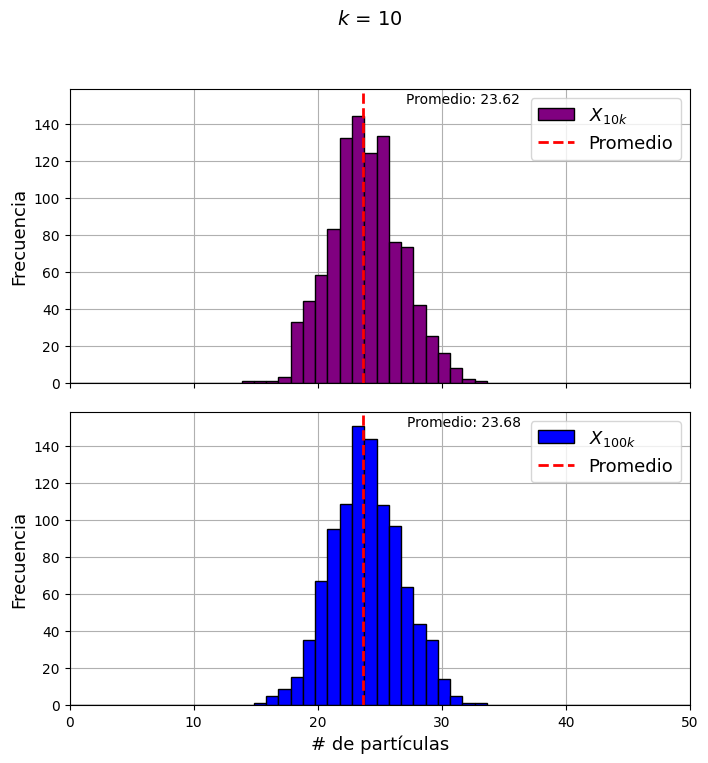

In [263]:
def plot_histograms():

    ## Valores para graficar en el caso X_10k
    average1 = find_expected_value(particle_distribution1, n_repetitions)
    keys1 = list(particle_distribution1.keys())
    values1 = list(particle_distribution1.values())

    ## Valores para graficar en el caso X_100k
    average2 = find_expected_value(particle_distribution2, n_repetitions)
    keys2 = list(particle_distribution2.keys())
    values2 = list(particle_distribution2.values())



    ## Opciones generales de la gráfica
    plt.rcParams['axes.axisbelow'] = True # Grid detrás de las figuras
    fig = plt.figure(figsize=(8,8))
    gs = fig.add_gridspec(2, hspace=0.1) # Espacio entre las gráficas
    axis = gs.subplots(sharex=True, sharey=True)


    ## Gráfica para X_10k
    axis[0].hist(keys1, bins=len(keys1), weights=values1, color='purple', edgecolor='k', alpha=1, label=r"$X_{10k}$")
    axis[0].axvline(average1, color='r', linestyle='dashed', linewidth=2, label="Promedio")
    axis[0].text(average1*1.15, max(values1)*1.05, 'Promedio: {:.2f}'.format(average1))


    # Gráfica para X_100k
    axis[1].hist(keys2, bins=len(keys2), weights=values2, color='b', edgecolor='k', alpha=1, label=r"$X_{100k}$")
    axis[1].axvline(average2, color='r', linestyle='dashed', linewidth=2, label="Promedio")
    axis[1].text(average2*1.15, max(values2)*1.00, 'Promedio: {:.2f}'.format(average2))



    for ii in range (len(axis)):
        axis[ii].set_ylabel("Frecuencia",size=13)
        axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
        axis[ii].grid()
        axis[ii].legend(fontsize=13)



    plt.xlabel("# de partículas", size=13)
    plt.xlim(0, 5*k)
    fig.suptitle(fr"$k$ = {k}", size=14)
    plt.show()
    
    
plot_histograms()

---
# Punto 3